Import necessary libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score


Load the Iris dataset

In [20]:
iris = load_iris()
X = iris.data
y = iris.target


Split the dataset into training and testing sets

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Train a Random Forest classifier

In [22]:
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Make predictions

In [23]:
y_pred = clf.predict(X_test)


Evaluate the model

In [24]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")
print(classification_report(y_test, y_pred, target_names=iris.target_names))

Model Accuracy: 1.00
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



Evaluate the model

In [25]:
def plot_feature_importances(model):
    n_features = X.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), iris.feature_names)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.show()

Plot feature importances

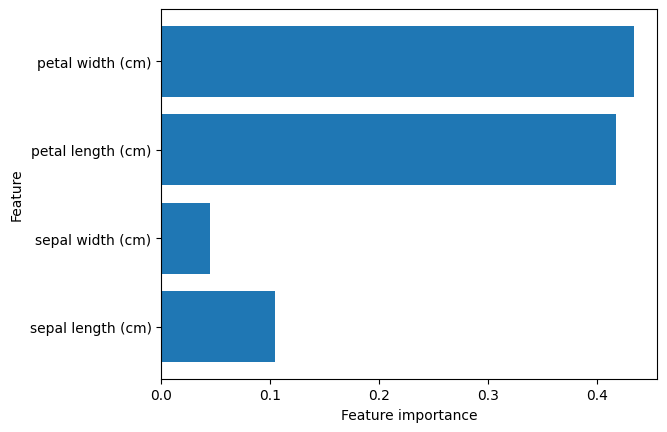

In [26]:
plot_feature_importances(clf)

Visualize classification results with a bar chart

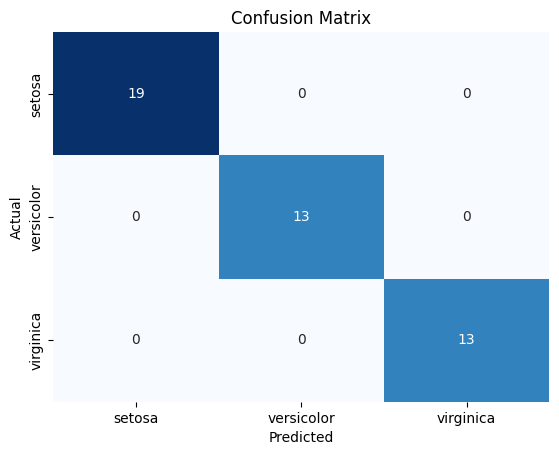

In [27]:
def plot_classification_results(y_test, y_pred):
    data = {
        'Actual': y_test,
        'Predicted': y_pred
    }
    df = pd.DataFrame(data, columns=['Actual', 'Predicted'])
    confusion_matrix = pd.crosstab(df['Actual'], df['Predicted'], rownames=['Actual'], colnames=['Predicted'])

    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=iris.target_names, yticklabels=iris.target_names)
    plt.title('Confusion Matrix')
    plt.show()

plot_classification_results(y_test, y_pred)
